In [10]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv') 
# data.head() # first n lines of data, defaults to 5
# data.tail() # last n lines of data, defaults to 5

In [17]:
data.replace('?', np.nan, inplace = True) # modifies the existing object, replacing first arg with second arg
# data.tail() # running this shows passenger 1305 has her age modified
# data.dtypes
data = data.astype({"age": np.float64, "fare": np.float64}) # modifies the types of age/fare to 64bit float (was previously object (run data.dtypes !))
# data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

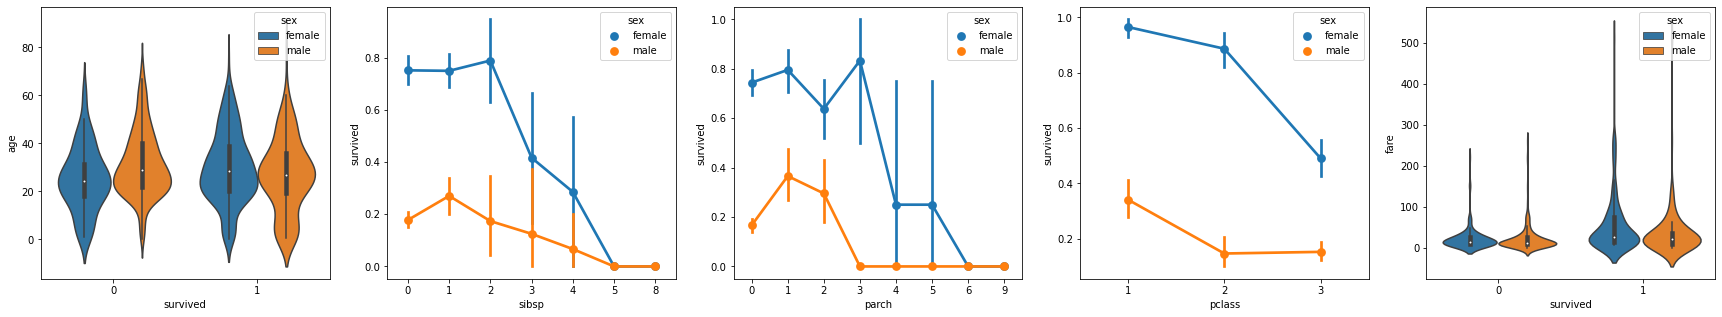

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [38]:
data.replace({"male": 1, "female": 0}, inplace = True)
data.corr().abs()[["survived"]] # data.corr().abs()[1:2]  -- this will produce the same result but as a row NB. 'survived' is the second row (0-indexed)
# corr() method -- finds pairwise sample correlation (see private discord for notes)
# data.corr().abs()
# data_abscorr = data.corr().abs()
# print(type(data_abscorr))
# print(type(data_abscorr['survived']))
# print(type(data_abscorr[['survived']]))

,pclass,survived,sex,age,sibsp,parch,fare
survived,0.312469,1.0,0.528693,0.055513,0.027825,0.08266,0.244265


In [44]:
data["relatives"] = data.apply(lambda row: int((row["sibsp"] + row["parch"]) > 0), axis = 1) 
# checking for at least one relative on board (if sibsp + parch is > 0)
data.corr().abs()[1:2]

,pclass,survived,sex,age,sibsp,parch,fare,relatives
survived,0.312469,1.0,0.528693,0.055513,0.027825,0.08266,0.244265,0.201719


In [45]:
data = data[["sex", "pclass", "age", "relatives", "fare", "survived"]].dropna()

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[["sex", "pclass", "age", "relatives", "fare"]], data.survived, test_size = 0.2, random_state = 1)
# returns tuples, x -- everything that isn't survived. y -- survived. x -- independent variable, y -- dependent variable, same as hs stuff
# testsize is for amt of data for the test set, in this case we have 20% of data for our test set, the remaining 80% for the training set
# we base the model on the 80%, then compare the model to the 20% test set for performance purposes
# choose 0 as an arbitrary seed for data selection for the training data

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
# scales original data to have the same range regardless of the choice of independent variable
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train) # uses scaled independent, dependent variable to fit gaussian naive bayes model
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
# uses aforementioned model and test data to map to potential dependent variable data, compares accuracy with actual data

# effectively
# 1. Import the class that contains the algorithm you need
# 2. Create an instance of the class
# 3. Use that object you created to fit the model on the training set
# 4. Attempt predicting the test set
# 5. Assess prediction accuracy

0.8229665071770335
